In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241219_135853.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241219_135853.braidz using pyarrow


In [4]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              1    77430  1.734613e+09  0.006007  0.136747  0.051566   
 1              1    77431  1.734613e+09  0.026116  0.168534  0.026042   
 2              2    77434  1.734613e+09  0.006019  0.136720  0.051556   
 3              2    77435  1.734613e+09  0.026140  0.168486  0.026074   
 4              3    77438  1.734613e+09  0.006599  0.138863  0.049240   
 ...          ...      ...           ...       ...       ...       ...   
 11299910  210072  7197083  1.734684e+09 -0.183341 -0.043800  0.002733   
 11299911  210072  7197084  1.734684e+09 -0.183338 -0.043806  0.002746   
 11299912  210072  7197085  1.734684e+09 -0.183341 -0.043811  0.002763   
 11299913  210072  7197086  1.734684e+09 -0.183343 -0.043817  0.002767   
 11299914  210072  7197087  1.734684e+09 -0.183351 -0.043821  0.002767   
 
               xvel      yvel      zvel           P00           P01  \
 0         1.318823  0.285553  0.632436

In [5]:
data = extract_stimulus_centered_data(df,csvs["opto"])

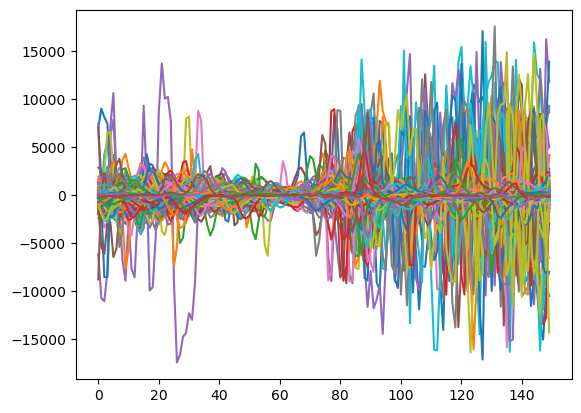

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

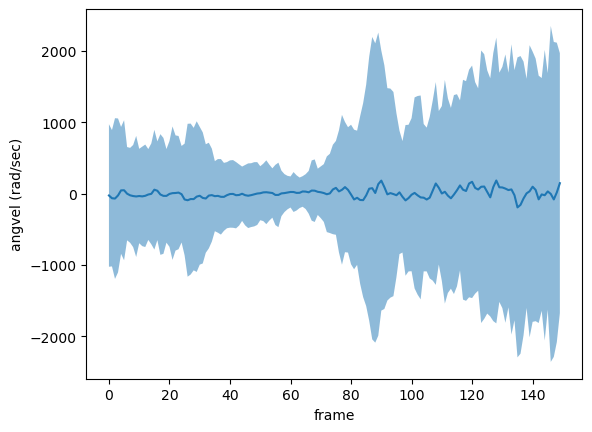

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

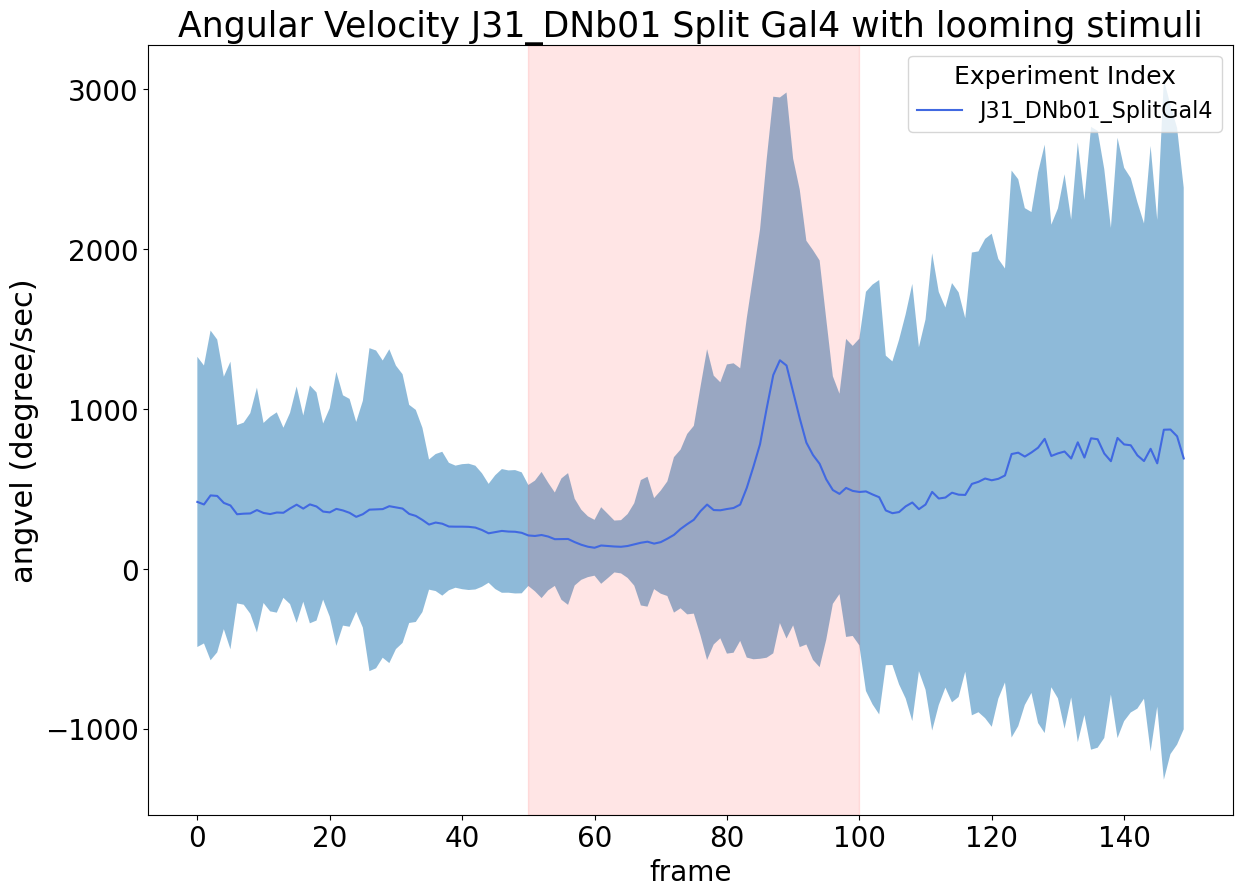

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='J31_DNb01_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 100, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J31_DNb01 Split Gal4 with looming stimuli", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
